In [1]:
import numpy as np, pandas as pd, ROOT, matplotlib.pyplot as plt,matplotlib
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

Welcome to JupyROOT 6.27/01


In [ ]:
f={}
t={}
dfs={}

In [190]:
#for a in "C H D Fe Pb".split():
for a in "Cu Al Sn".split():
    f[a]=ROOT.TFile(f'ahmed/{a}_10pt6GeV.root')
    #f=ROOT.TFile(f'../GiBUU_10pt6GeV.root')
    t[a]=f[a].Get("RootTuple")
    print([b.GetName() for b in t[a].GetListOfBranches()])
    N=t[a].GetEntries()
    Ebeam=10.6
    count=0
    Mp=0.9383
    maxevents=1000000
    d={}
    for var in 'weight x Q2 nu z leading_z pT2 leading_pid pid leading_pT2 leading_phi phi drap theta1lab theta2lab rap1 rap2 p leading_p'.split():
        d[var]=[]
    for event in t[a]:
        if event.Q2<1:
            continue
        if event.nu/Ebeam>0.85:
            continue
        W=np.sqrt(-event.Q2+Mp**2+2*Mp*event.nu)
        if W<2:
            continue
        if not count%10000 :
            print(count, "/", N, "%.3f%%"% (count/N*100))
        if count > maxevents:
            break
        Emax=0
        pid_leading=0
        for h in range(len(event.Px)):
            if event.E[h]>Emax:
                Emax = event.E[h]
                h_at_max=h
        pid_leading = event.barcode[h_at_max]
        pT2_leading = event.Px[h_at_max]**2+event.Py[h_at_max]**2
        phi_leading = np.arctan2(event.Py[h_at_max], event.Px[h_at_max])
        Y_leading = 1/2*np.log((event.E[h_at_max]+event.Pz[h_at_max])/(event.E[h_at_max]-event.Pz[h_at_max]))
        z_leading=Emax/event.nu


        thetae = 2*np.arcsin(np.sqrt(event.Q2/(4*Ebeam*(Ebeam-event.nu))))
        thetaq = np.arcsin((Ebeam-event.nu)*np.sin(thetae)/np.sqrt(event.nu**2+event.Q2))
        for h in range(len(event.Px)):
            d['weight'].append(event.weight)
            d['Q2'].append(event.Q2)
            d['nu'].append(event.nu)
            d['x'].append(event.Q2/(Mp*2*event.nu))
            d['z'].append(event.E[h]/event.nu)
            d['pT2'].append(event.Px[h]**2+event.Py[h]**2)
            d['p'].append(np.sqrt(event.Px[h]**2+event.Py[h]**2+event.Pz[h]**2))
            d['leading_p'].append(np.sqrt(event.Px[h_at_max]**2+event.Py[h_at_max]**2+event.Pz[h_at_max]**2))
            d['pid'].append(event.barcode[h])
            d['leading_z'].append(z_leading)
            d['leading_pid'].append(pid_leading)
            d['leading_pT2'].append(pT2_leading)
            d['leading_phi'].append(phi_leading)
            d['phi'].append(np.arctan2(event.Py[h], event.Px[h]))
            Y2 = 1/2*np.log((event.E[h]+event.Pz[h])/(event.E[h]-event.Pz[h]))

            d['rap1'].append(Y_leading)
            d['rap2'].append(Y2)
            d['drap'].append(Y_leading-Y2)

            theta1lab=np.arccos((np.sin(thetaq)*event.Px[h_at_max]+np.cos(thetaq)*event.Pz[h_at_max])/\
                                np.sqrt(event.Px[h_at_max]**2+event.Py[h_at_max]**2+event.Pz[h_at_max]**2))
            theta2lab=np.arccos((np.sin(thetaq)*event.Px[h]+np.cos(thetaq)*event.Pz[h])/\
                                np.sqrt(event.Px[h]**2+event.Py[h]**2+event.Pz[h]**2))

            d["theta1lab"].append(theta1lab)
            d['theta2lab'].append(theta2lab)
        count+=1
    dfs[a] = pd.DataFrame(d)
    dfs[a]['deg']=[np.pi/180]*len(dfs[a])
#root_pandas.to_root(df,f'ahmed/drap_test_22GeV_hadrons.root', 'hadrons')

['weight', 'barcode', 'Px', 'Py', 'Pz', 'E', 'x', 'y', 'z', 'evType', 'nu', 'Q2', 'eps', 'phiL']
0 / 2799737 0.000%
10000 / 2799737 0.357%
20000 / 2799737 0.714%
30000 / 2799737 1.072%
40000 / 2799737 1.429%
50000 / 2799737 1.786%
60000 / 2799737 2.143%
70000 / 2799737 2.500%
80000 / 2799737 2.857%
90000 / 2799737 3.215%
100000 / 2799737 3.572%
110000 / 2799737 3.929%
120000 / 2799737 4.286%
130000 / 2799737 4.643%
140000 / 2799737 5.000%
150000 / 2799737 5.358%
160000 / 2799737 5.715%
170000 / 2799737 6.072%
180000 / 2799737 6.429%
190000 / 2799737 6.786%
200000 / 2799737 7.144%
210000 / 2799737 7.501%
220000 / 2799737 7.858%
230000 / 2799737 8.215%
240000 / 2799737 8.572%
250000 / 2799737 8.929%
260000 / 2799737 9.287%
270000 / 2799737 9.644%
280000 / 2799737 10.001%
290000 / 2799737 10.358%
300000 / 2799737 10.715%
310000 / 2799737 11.072%
320000 / 2799737 11.430%
330000 / 2799737 11.787%
340000 / 2799737 12.144%
350000 / 2799737 12.501%
360000 / 2799737 12.858%
370000 / 2799737 13.

In [203]:
dfs["Cu"]=dfs["Fe"] #copper is close enough to Fe that we can use the existing Fe predictions for Cu

PACday35 = 8.64e9 # mub^-1, corresponding to 1 PAC days at 10^35 cm^-2 s^-1
scale={}
sigma_C_12GeV=243.05 #mub
scale["C"] = (7*PACday35*sigma_C_12GeV)/maxevents
sigma_H_12GeV=15.306 #mub
scale_H = (60*PACday35*sigma_H_12GeV)/maxevents  #number of pac days for the exisiting H data
sigma_D_12GeV=39.429 #mub
scale["D"] = (44.4*PACday35*sigma_D_12GeV)/maxevents

#sigma_Fe_12GeV=756.47
#scale_Fe = (lumi*sigma_Fe_12GeV)/maxevents


scale["Al"] = (8*PACday35*sigma_Al_12GeV)/maxevents

sigma_Cu_12GeV=756.47
scale["Cu"] = (9*PACday35*sigma_Cu_12GeV)/maxevents
sigma_Sn_12GeV=1564.9
scale["Sn"] = (16*0.6*PACday35*sigma_Sn_12GeV)/maxevents
sigma_Pb_12GeV=2798.6
scale["Pb"] = (18*0.6*PACday35*sigma_Pb_12GeV)/maxevents

pT2min=0.3**2
h1pid=211;
h2pid=2212
thetamax=135

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.85 
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<135*3.14159/180
 and theta2lab<135*3.14159/180
[  0.           2.3157752   26.22769898  73.32860646 132.25121405
 208.41217601] [-0.8 -0.2  0.4  1.   1.6  2.2  2.8]
[           inf 3.37555015e-05 1.00302710e-05 5.99868488e-06
 4.46676321e-06 3.55820708e-06]


<ipython-input-102-43d889a2493f>:10: RuntimeWarning: divide by zero encountered in true_divide
  dy=np.sqrt(2)/pol/np.sqrt(h*scale)
<ipython-input-102-43d889a2493f>:12: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(x, 0*dy, dy, linestyle='', marker='o')


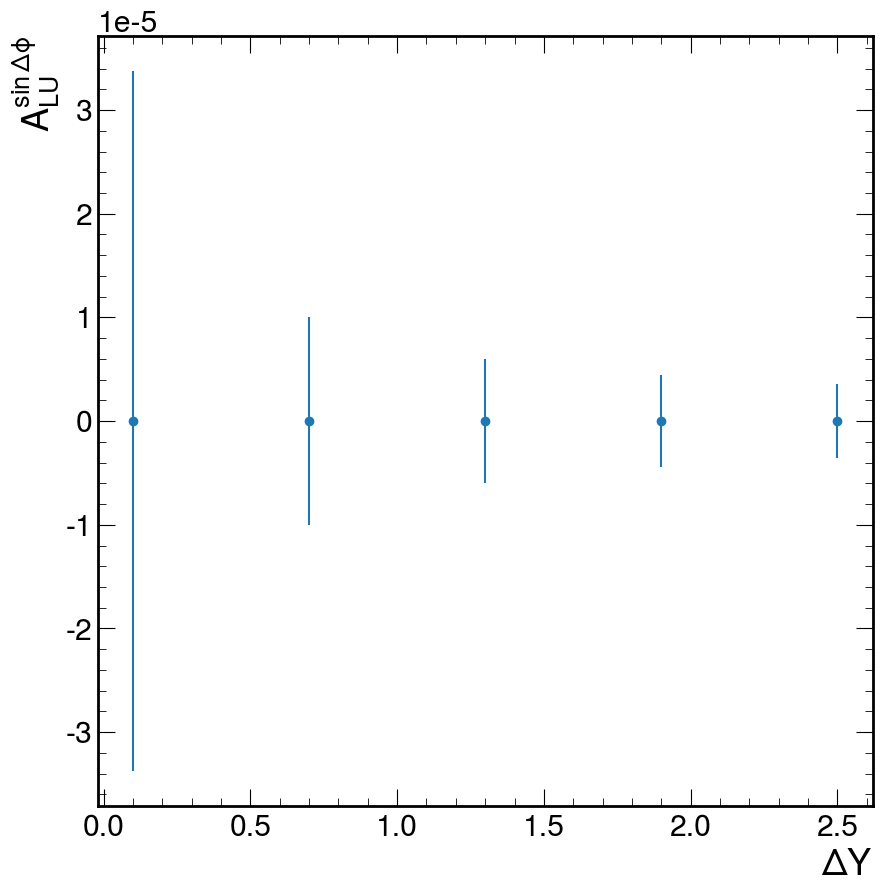

In [102]:
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min} and Q2>1 and nu/10.6<0.85 "
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))
a=df.query(q).drap
h,bins=np.histogram(a, bins=np.linspace(-0.8, 2.8, 7), weights=1/df.query(q).weight)
print(h,bins)

pol=0.85
dy=np.sqrt(2)/pol/np.sqrt(h*scale)
x=(bins[1:]+bins[:-1])/2
plt.errorbar(x, 0*dy, dy, linestyle='', marker='o')
print(dy)
plt.xlabel ("$\Delta Y$")
plt.ylabel ("$\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}$")
plt.show()

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.75
 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*3.14159/180
 and sqrt(.9383**2+2*nu*.9383-Q2)>2
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<30*3.14159/180
 and theta2lab<30*3.14159/180
 and drap>0
 and leading_p<4.0
 and leading_p>1.2
 and p>0.5
[           inf 1.38826996e-04 3.37629938e-05 1.95379162e-05
 2.32735396e-05 7.83504094e-05]


<ipython-input-103-a25dd886fb27>:12: RuntimeWarning: divide by zero encountered in true_divide
  dy=np.sqrt(2)/pol/np.sqrt(Nh*scale_H*.85**3*.7)
<ipython-input-103-a25dd886fb27>:14: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(x, 0*dy, dy, linestyle='', marker='o')


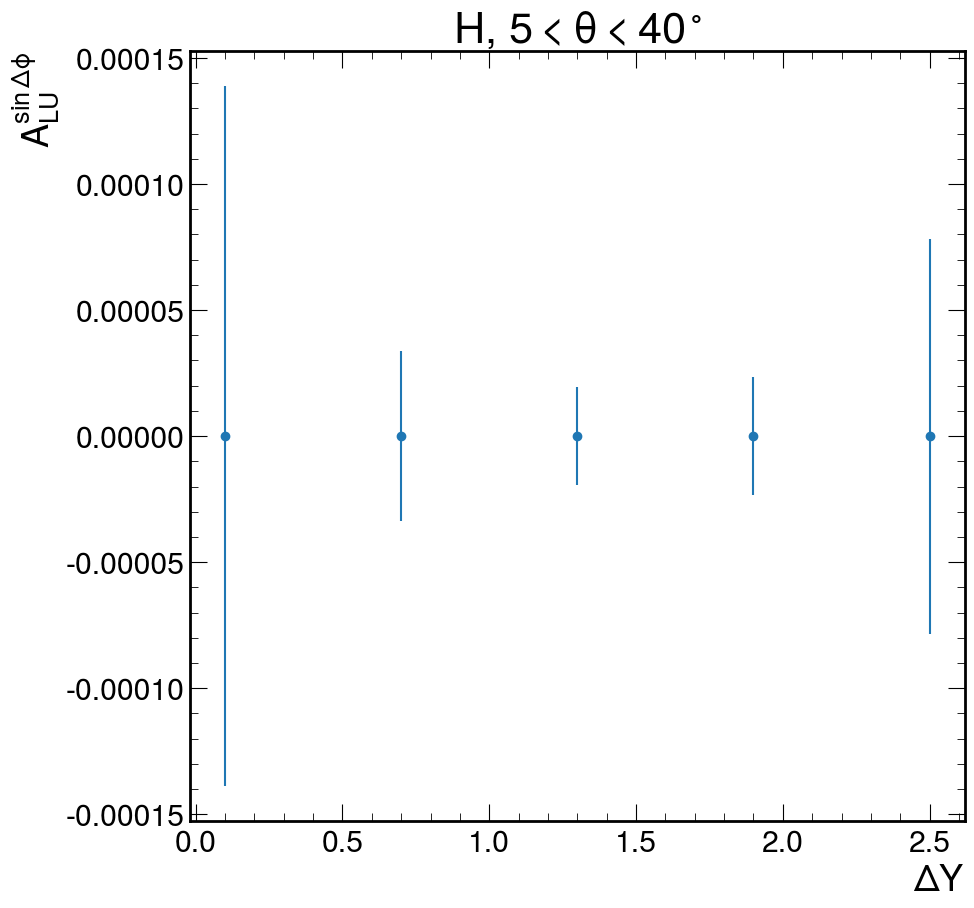

In [103]:
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.75 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<30*deg and theta2lab<30*deg"
q+=" and drap>0 and leading_p<4.0 and leading_p>1.2 and p>0.5"
#q+=" and "
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))
Nh,bins=np.histogram(dfs["H"].query(q).drap, bins=np.linspace(-0.8, 2.8, 7))#, weights=dfs["H"].query(q).weight)
#print(h,bins)

pol=0.85
dy=np.sqrt(2)/pol/np.sqrt(Nh*scale_H*.85**3*.7)
x=(bins[1:]+bins[:-1])/2
plt.errorbar(x, 0*dy, dy, linestyle='', marker='o')
print(dy)
plt.xlabel ("$\Delta Y$")
plt.ylabel ("$\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}$")
plt.title("H, $5<\\theta<40^\\circ$")
plt.show()

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.85 
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<135*3.14159/180
 and theta2lab<135*3.14159/180
[8.84209591e-05 1.03717017e-05 1.06863549e-05 1.47814396e-05
 2.01653639e-05 2.77138864e-05]


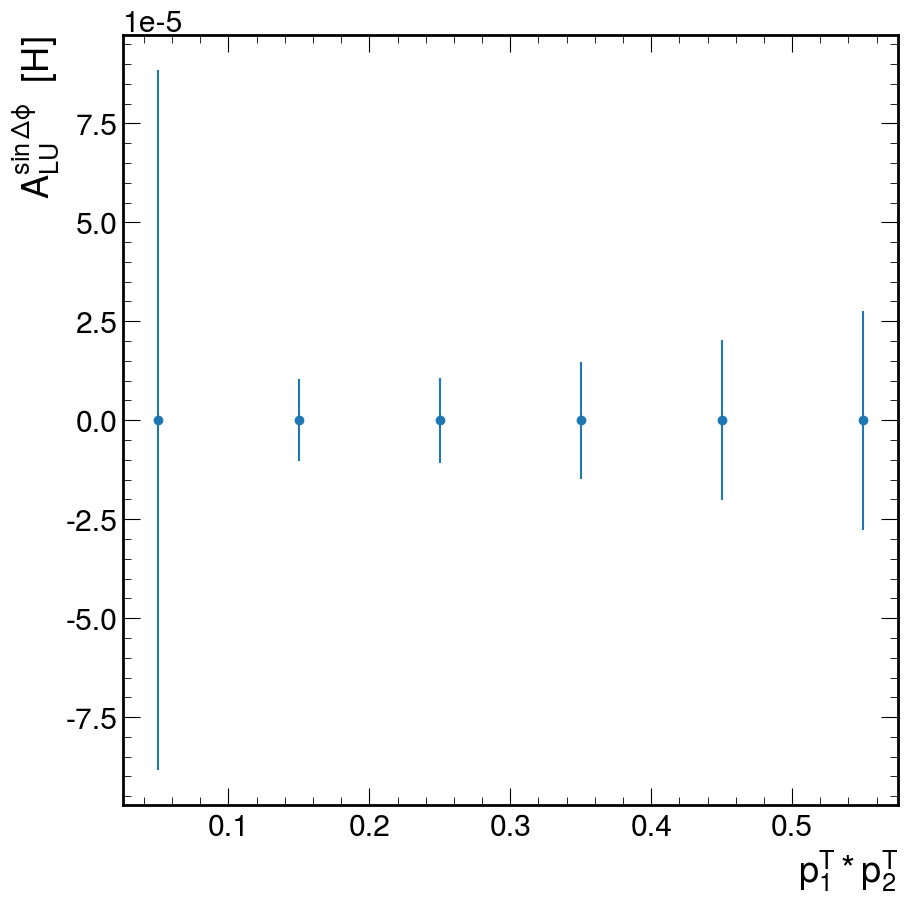

In [104]:
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min} and Q2>1 and nu/10.6<0.85 "
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))
Nh,bins=np.histogram(dfs["H"].query(q).eval("sqrt(leading_pT2*pT2)"), bins=np.linspace(0, 0.6, 7))#, weights=dfs["H"].query(q).weight)
#Nc,bins=np.histogram(dfs["C"].query(q).drap, bins=np.linspace(-0.8, 2.8, 7))#, weights=dfs["H"].query(q).weight)

#print(h,bins)

pol=0.85
dy=np.sqrt(2)/pol/np.sqrt(Nh*scale_H*.85**3*.7)
x=(bins[1:]+bins[:-1])/2
plt.errorbar(x, 0*dy, dy, linestyle='', marker='o')
print(dy)
plt.xlabel ("$p^T_1*p^T_2$")
plt.ylabel ("$\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}$  [H]")
plt.show()

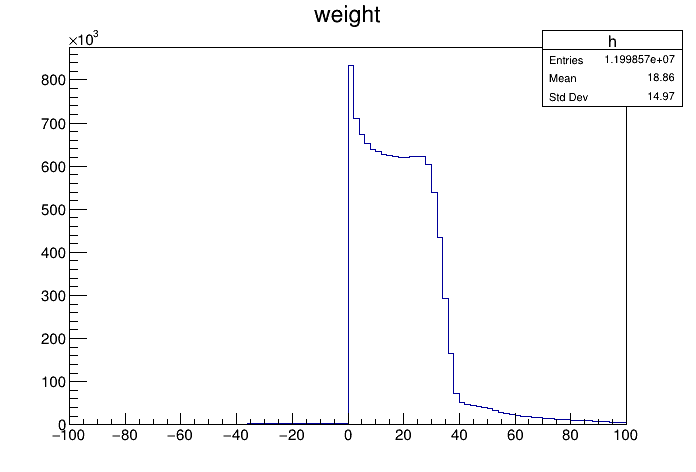

In [54]:
c=ROOT.TCanvas()
t.Draw("weight>>h(100, -100, 100)")
c.Draw()

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.85
 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*3.14159/180
 and sqrt(.9383**2+2*nu*.9383-Q2)>2
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<40*3.14159/180
 and theta2lab<40*3.14159/180
[   1  120 1965 5827 6705 3527] [   0  104 2089 5566 4985 1734] [   0   73 1377 5493 8240 4292]
[8.84209591e-05 1.03717017e-05 1.06863549e-05 1.47814396e-05
 2.01653639e-05 2.77138864e-05]


<ipython-input-108-127e0339cb5c>:23: RuntimeWarning: divide by zero encountered in true_divide
  sc=1/np.sqrt(Nc*scale_C/(Nh*scale_H))
<ipython-input-108-127e0339cb5c>:28: RuntimeWarning: invalid value encountered in true_divide
  sd=1/np.sqrt(Nd*scale_D/(Nh*scale_H))


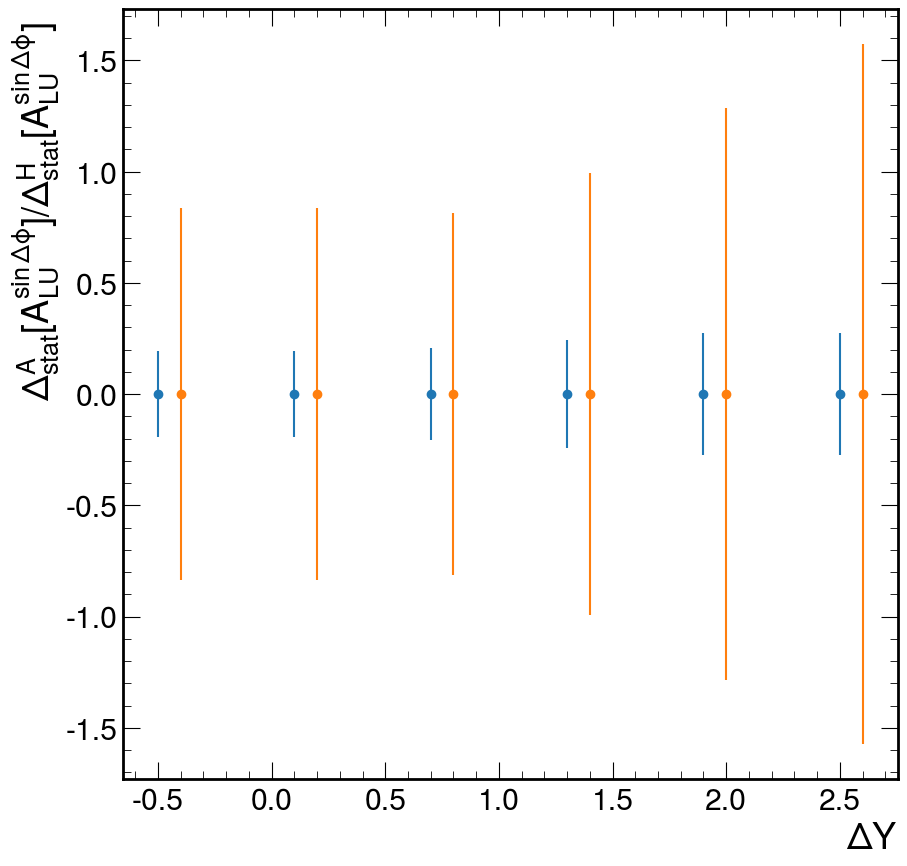

In [108]:
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<40*deg and theta2lab<40*deg"
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))
Nh,bins=np.histogram(dfs["H"].query(q).drap, bins=np.linspace(-0.8, 2.8, 7))#, weights=dfs["H"].query(q).weight)

#different maximum theta due to the CVT
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
Nc,bins=np.histogram(dfs["C"].query(q).drap, bins=np.linspace(-0.8, 2.8, 7))#, weights=dfs["H"].query(q).weight)

#q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
#q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
#q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
Nd,bins=np.histogram(dfs["D"].query(q).drap, bins=np.linspace(-0.8, 2.8, 7))#, weights=dfs["H"].query(q).weight)


#print(h,bins)

pol=0.85
sc=1/np.sqrt(Nc*scale_C/(Nh*scale_H))
sc[0]=sc[1]
x=(bins[1:]+bins[:-1])/2
plt.errorbar(x, 0*sc, sc, linestyle='', marker='o', label="")

sd=1/np.sqrt(Nd*scale_D/(Nh*scale_H))
sd[0]=sd[1]
plt.errorbar(x+.1, 0*sd, sd, linestyle='', marker='o')

print(Nc,Nd, Nh)
print(dy)
plt.xlabel ("$\Delta Y$")
plt.ylabel ("$\Delta_{\\rm stat}^A[\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}]/\Delta_{\\rm stat}^H[\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}]$  ")
plt.title("")
plt.show()

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.85
 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*3.14159/180
 and sqrt(.9383**2+2*nu*.9383-Q2)>2
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<40*3.14159/180
 and theta2lab<40*3.14159/180
[   0  104 2089 5566 4985 1734  215]
[   1  120 1965 5827 6705 3527  726]
[   0   23  611 3280 8286 9977 4003]


<ipython-input-209-ff10f70fab95>:36: RuntimeWarning: invalid value encountered in true_divide
  sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]
<ipython-input-209-ff10f70fab95>:36: RuntimeWarning: divide by zero encountered in true_divide
  sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]
<ipython-input-209-ff10f70fab95>:36: RuntimeWarning: invalid value encountered in true_divide
  sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]
<ipython-input-209-ff10f70fab95>:36: RuntimeWarning: invalid value encountered in true_divide
  sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]


[   0   15  415 2318 6254 7643 3068]
(0.0033, 0.0034, 0.0068, 0.029)


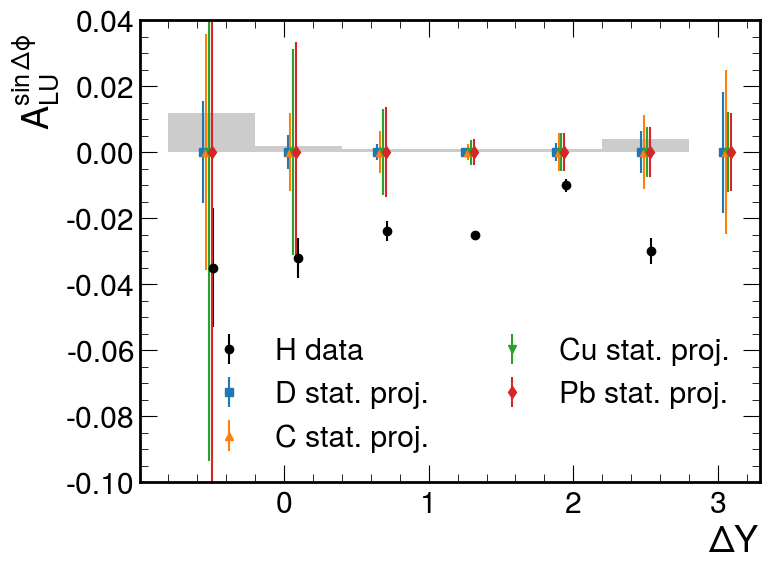

In [209]:
fig, axs=plt.subplots(1,1, figsize=(8, 6))
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<40*deg and theta2lab<40*deg"
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))

bins=np.linspace(-0.8, 3.4, 8)
Nh,bins=np.histogram(dfs["H"].query(q).drap, bins=bins)#, weights=dfs["H"].query(q).weight)



Harut_x=np.array([-.487,.097,0.714, 1.321, 1.947, 2.537])
Harut_y=np.array([-.035,-0.032,-0.024,-0.025, -0.01, -0.03])
Harut_stat=np.array([.018,0.006,0.003,0.001, 0.002, 0.004])
Harut_syst=np.array([.012,0.002,0.001,0.001, 0.001, 0.004])

plt.errorbar(Harut_x, Harut_y, Harut_stat, linestyle='', marker='o', color='k', label="H data")


AA={"D":2,"C":12, "Al":27, "Cu": 63, "Sn": 118, "Pb":208}
colors='tab:blue tab:orange tab:green tab:red tab:purple tab:brown'.split()
markers='s^vdD*'

#for j,A in enumerate("D C Al Cu Sn Pb".split()):

for j,A in enumerate("D C Cu Pb".split()):
    #different maximum theta due to the CVT
    q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
    q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
    q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
    Na,_=np.histogram(dfs[A].query(q).drap, bins=bins)#, weights=dfs["H"].query(q).weight)
    
    print(Na)
    
    sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]
    sa*=np.sqrt(AA[A]) #per nucleon, not per nucleus
    sa[0]=sa[1]
    plt.errorbar(Harut_x+(j-3.5)*.02, 0*sa, Harut_stat*sa, linestyle='',color=colors[j], marker=markers[j], label=f"{A} stat. proj.")
    extended=(Harut_stat*sa)[5]*1/np.sqrt(Na[6:]/Na[5])
    x=(bins[1:]+bins[:-1])/2
    plt.errorbar(x[6:]+(j-3.5)*.02, 0*Na[6:], extended, linestyle='',color=colors[j], marker=markers[j])


# #print(h,bins)



# pol=0.85
# sd=1/np.sqrt(Nd*scale_D/(Nh*scale_H))[:6]
# sd[0]=sd[1]
# sd*=np.sqrt(2) #per nucleon, not per nucleus

# x=(bins[1:]+bins[:-1])/2

# plt.errorbar(Harut_x-.02, 0*sd, Harut_stat*sd, linestyle='', color='r', marker='s', label="D stat. proj.")
# extended=(Harut_stat*sd)[5]*1/np.sqrt(Nd[6:]/Nd[5])
# plt.errorbar(x[6:]-.02, 0*Nd[6:], extended, linestyle='', color='r', marker='s')





# sfe=1/np.sqrt(Nfe*scale_Fe/(Nh*scale_H))[:6]
# sfe*=np.sqrt(56) #per nucleon, not per nucleus
# sfe[0]=sfe[1]
# plt.errorbar(Harut_x+.02, 0*sfe, Harut_stat*sfe, linestyle='',color='#ffaa00', marker='^', label="Fe stat. proj.")
# extended=(Harut_stat*sfe)[5]*1/np.sqrt(Nfe[6:]/Nfe[5])
# plt.errorbar(x[6:]+.02, 0*Nfe[6:], extended, linestyle='',color='#ffaa00', marker='^')


# spb=1/np.sqrt(Npb*scale_Pb/(Nh*scale_H))[:6]
# spb*=np.sqrt(208) #per nucleon, not per nucleus
# spb[0]=spb[1]
# plt.errorbar(Harut_x+.04, 0*spb, Harut_stat*spb, linestyle='',color='g', marker='d', label="Pb stat. proj.")
# extended=(Harut_stat*spb)[5]*1/np.sqrt(Npb[6:]/Npb[5])
# plt.errorbar(x[6:]+.04, 0*Npb[6:], extended, linestyle='',color='g', marker='d')

#systematic uncertainties
plt.bar(x[:6], Harut_syst,0.6, alpha=0.2, color='k')

plt.ylim(-.1, 0.04)
plt.legend(loc='lower right', ncol=2)


print(dy)
plt.xlabel ("$\Delta Y$")
plt.ylabel ("$\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}$  ")
plt.savefig("stat_proj_vs_Harut.pdf")
plt.savefig("stat_proj_vs_Harut.png")
plt.show()

theta1lab!=theta2lab
 and leading_z>0.5
 and pT2>0.09
 and leading_pT2>0.09
 and Q2>1
 and nu/10.6<0.85
 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*3.14159/180
 and sqrt(.9383**2+2*nu*.9383-Q2)>2
 and leading_pid==211
 and pid==2212
 and theta1lab>5*3.14159/180
 and theta2lab>5*3.14159/180
 and theta1lab<40*3.14159/180
 and theta2lab<40*3.14159/180
[1138 5412 4074 2176 1069  548]
[1589 6885 4852 2766 1592  790]
[1811 9901 9523 3796 1204  243]
[1526 7467 7219 2772  814  180]
[1589 6885 4852 2766 1592  790] [1138 5412 4074 2176 1069  548] [1052 6826 7669 3187 1065  198]
(0.0033, 0.0034, 0.0068, 0.029)


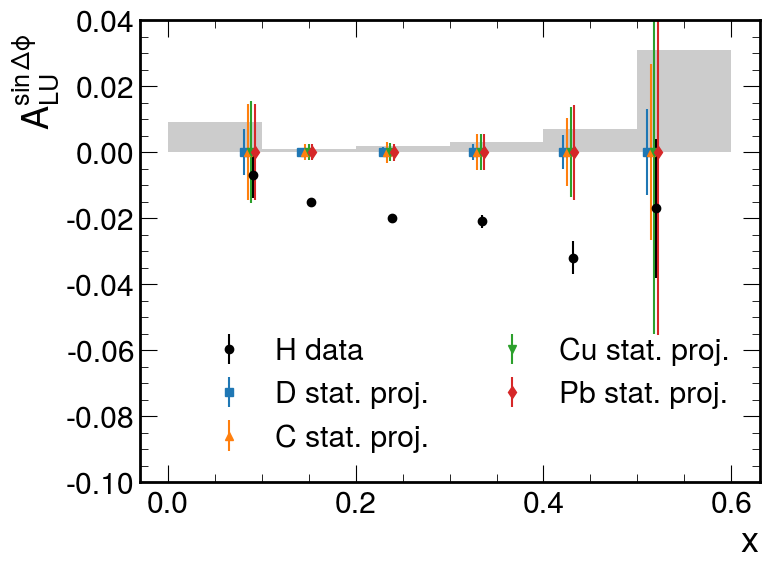

In [213]:
fig, axs=plt.subplots(1,1, figsize=(8, 6))
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<40*deg and theta2lab<40*deg"
q=q.replace("deg", "3.14159/180")
print(q.replace(" and ", "\n and "))

bins=np.linspace(0, 0.6, 7)
Nh,_=np.histogram(dfs["H"].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)

#different maximum theta due to the CVT
q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
Nc,_=np.histogram(dfs["C"].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)

Nd,_=np.histogram(dfs["D"].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)
Nfe,_=np.histogram(dfs["Fe"].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)
Npb,_=np.histogram(dfs["Pb"].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)


#print(h,bins)

Harut_x=np.array([0.095,0.156,0.243, 0.339, 0.435, 0.524])
Harut_y=np.array([-.007,-0.015,-0.020,-0.021, -0.032, -0.017])
Harut_stat=np.array([.007,0.001,0.001,0.002, 0.005, 0.021])
Harut_syst=np.array([.009,0.001,0.002,0.003, 0.007, 0.031])

plt.errorbar(Harut_x-.004, Harut_y, Harut_stat, linestyle='', marker='o', color='k', label="H data")

AA={"D":2,"C":12, "Al":27, "Cu": 63, "Sn": 118, "Pb":208}
colors='tab:blue tab:orange tab:green tab:red tab:purple tab:brown'.split()
markers='s^vdD*'

for j,A in enumerate("D C Cu Pb".split()):
    #different maximum theta due to the CVT
    q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min}"
    q+=" and Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
    q+=" and leading_pid==211 and pid==2212 and theta1lab>5*deg and theta2lab>5*deg and theta1lab<135*deg and theta2lab<135*deg"
    Na,_=np.histogram(dfs[A].query(q).x, bins=bins)#, weights=dfs["H"].query(q).weight)
    
    print(Na)
    
    sa=1/np.sqrt(Na*scale[A]/(Nh*scale_H))[:6]
    sa*=np.sqrt(AA[A]) #per nucleon, not per nucleus
    plt.errorbar(Harut_x+(j-3.5)*.004, 0*sa, Harut_stat*sa, linestyle='',color=colors[j], marker=markers[j], label=f"{A} stat. proj.")
    

# pol=0.85
# sd=1/np.sqrt(Nd*scale_D/(Nh*scale_H))[:6]
# #sd[0]=sd[1]
# sd*=np.sqrt(2) #per nucleon, not per nucleus

# x=(bins[1:]+bins[:-1])/2

# plt.errorbar(Harut_x-.002, 0*sd, Harut_stat*sd, linestyle='', color='r', marker='s', label="D stat. proj.")

# #extended=(Harut_stat*sd)[5]*1/np.sqrt(Nd[6:]/Nd[5])
# #plt.errorbar(x[6:], 0*Nd[6:], extended, linestyle='', color='r', marker='s')



# sc=1/np.sqrt(Nc*scale_C/(Nh*scale_H))[:6]
# sc*=np.sqrt(12) #per nucleon, not per nucleus
# #sc[0]=sc[1]

# plt.errorbar(Harut_x, 0*sc, Harut_stat*sc, linestyle='',color='b', marker='v', label="C stat. proj.")



# sfe=1/np.sqrt(Nfe*scale_Fe/(Nh*scale_H))[:6]
# sfe*=np.sqrt(56) #per nucleon, not per nucleus
# plt.errorbar(Harut_x+.002, 0*sfe, Harut_stat*sfe, linestyle='',color='#ffaa00', marker='^', label="Fe stat. proj.")


# spb=1/np.sqrt(Npb*scale_Pb/(Nh*scale_H))[:6]
# spb*=np.sqrt(208) #per nucleon, not per nucleus
# plt.errorbar(Harut_x+.004, 0*spb, Harut_stat*spb, linestyle='',color='g', marker='d', label="Pb stat. proj.")

#extended=(Harut_stat*sc)[5]*1/np.sqrt(Nc[6:]/Nc[5])
#plt.errorbar(x[6:]+.05, 0*Nc[6:], extended, linestyle='',color='b', marker='v')

#systematic uncertainties
x=(bins[1:]+bins[:-1])/2
plt.bar(x, Harut_syst,0.1, alpha=0.2, color='k')

plt.ylim(-.1, 0.04)
plt.legend(loc='lower right',ncol=2)

print(Nc,Nd, Nh)
print(dy)
plt.xlabel ("$x$")
plt.ylabel ("$\\mathcal{A}^{\\sin\\Delta\\phi}_{LU}$  ")
plt.savefig("stat_proj_vs_Harut_x.pdf")
plt.savefig("stat_proj_vs_Harut_x.png")
plt.show()

[0.05 0.15 0.25 0.4 ] [1.20228828e-06 4.99993890e-07 5.14825314e-07 5.49461941e-07]
[0.05 0.15 0.25 0.4 ] [1.33293425e-06 5.68041678e-07 5.38358016e-07 5.92700493e-07]
[0.05 0.15 0.25 0.4 ] [1.28395641e-06 5.44274248e-07 5.14419338e-07 5.74824080e-07]


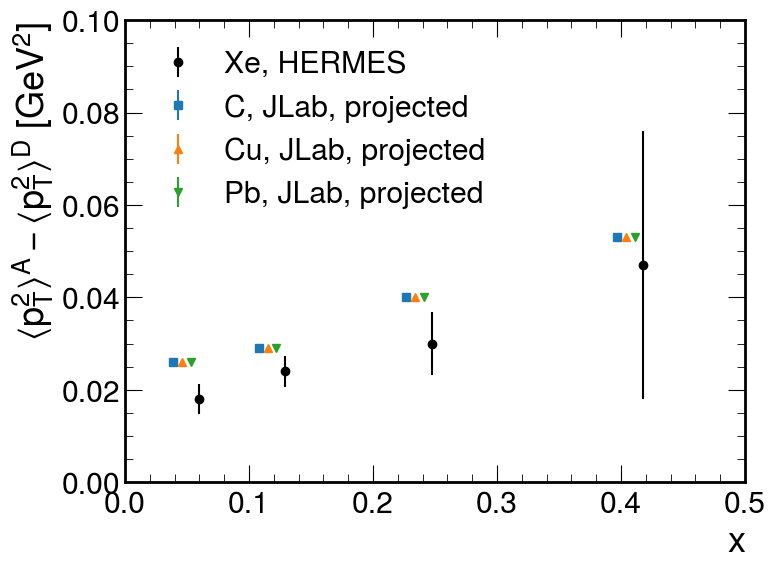

In [220]:
fig, axs=plt.subplots(1,1, figsize=(8, 6))


x_data=np.array((0.06, 0.129, 0.248, 0.418))
y=(0.018, 0.024, 0.030, 0.047)
dy=(0.0033, 0.0034, 0.0068, 0.029)



plt.errorbar(x_data,y,dy, label='Xe, HERMES', marker='o', linestyle='', color='k')

#scale={"C":scale[/12, "D":scale_D/2, "Fe":scale_Fe/56, "Pb":scale_Pb/208}
bins=np.array((0, 0.1, 0.2, 0.3, .5))
markers="v^d"
colors="b #ffaa00 g".split()
#Q2bins=(1, 1.5,2,3, 4,7, 10)
Q2bins=(1, 100)

AA={"D":2,"C":12, "Al":27, "Cu": 63, "Sn": 118, "Pb":208}
colors='tab:blue tab:orange tab:green tab:red tab:purple tab:brown'.split()
markers='s^vdD*'

for j,A in enumerate("C Cu Pb".split()):
    
    for k in range(len(Q2bins)-1):
        stats=[]
        x=[]
        y=[]
        for i in range(len(bins)-1):
            q=" Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
            q+= " and pid==211 and z>0.1 and theta2lab>5*deg and theta2lab<135*deg"
            q+= f" and Q2>{Q2bins[k]} and Q2<{Q2bins[k+1]}"
            q+= f" and x>{bins[i]} and x<{bins[i+1]}"
            a=dfs[A].query(q).eval("pT2")
            d=dfs["D"].query(q).eval("pT2")
            if len(a)!=0 and len(d)!=0:
                x.append((bins[i]+bins[i+1])/2)
                y.append(np.mean(a)-np.mean(d))
                stats.append(np.sqrt(np.std(a)**2/(scale[A]*len(a)/AA[A])+np.std(d)**2/(scale["D"]*len(d)/2)))
            del a,d
        stats=np.array(stats)
        x=np.array(x)
        print(x,stats)
        y=[0.026, 0.029, 0.040, 0.053]
        plt.errorbar(x_data+.007*(j-3), y,stats, linestyle='', color=colors[j], marker=markers[j], label=f"{A}, JLab, projected")
plt.xlim(0, 0.5)
plt.ylim(0, 0.1)
plt.xlabel("x")



plt.ylabel("$\\langle p_T^2\\rangle^A-\\langle p_T^2\\rangle^D$ [GeV$^2$]")
plt.legend(loc='upper left', ncol=1)
plt.savefig("Hermes_vs_projected.pdf")
plt.show()

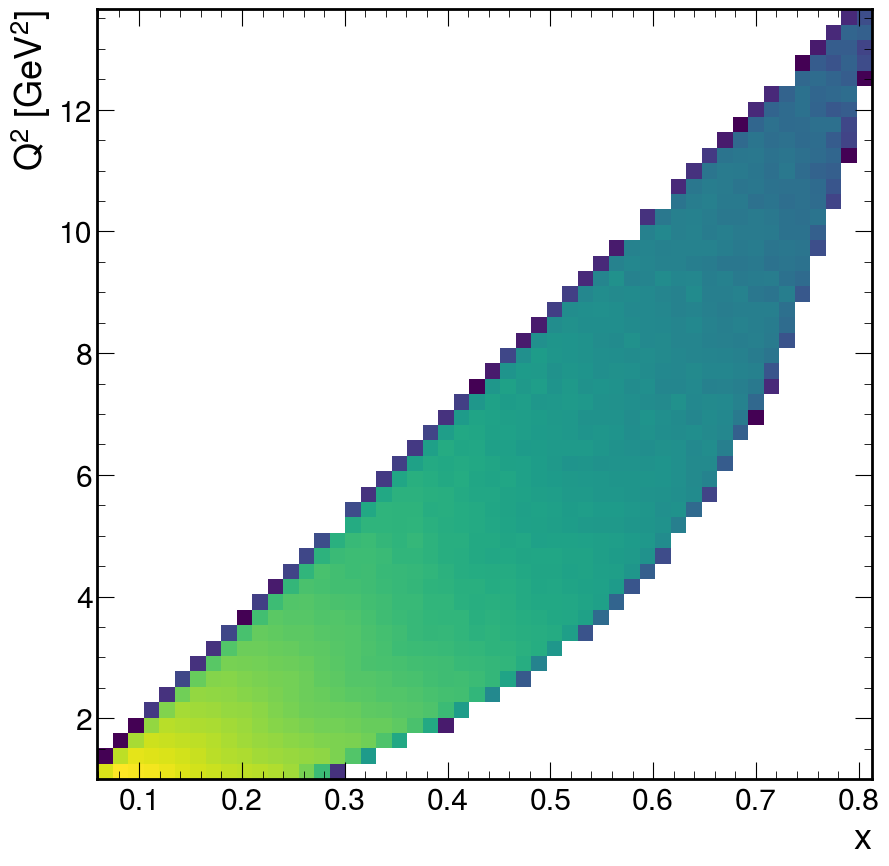

In [225]:
q=" Q2>1 and nu/10.6<0.85 and 2*arcsin(sqrt(Q2/(4*10.6*(10.6-nu))))>5*deg and sqrt(.9383**2+2*nu*.9383-Q2)>2"
q+= " and pid==211 and z>0.1 and theta2lab>5*deg and theta2lab<135*deg"
#q+= f" and Q2>{Q2bins[k]} and Q2<{Q2bins[k+1]}"
#q+= f" and x>{bins[i]} and x<{bins[i+1]}"
dfq=dfs["D"].query(q)
import matplotlib as mpl
plt.hist2d(dfq.x, dfq.Q2, bins=50, norm = mpl.colors.LogNorm())

plt.xlabel("$x$")
plt.ylabel("$Q^2$ [GeV$^2$]")
plt.show()